In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### I/O

In [2]:
FIGURE_SAVEPATH = "../../../figures/"
TYPE1_ERROR_SAVEPATH = "../../../output/type1_errors/"
SAVELABELS = ["simple_demo", "binary_regression", "heterogeneous_linear_rct",
              "kang_schafer", "linear_nonneg_rct"]
SIMPLE_DEMO_SUFFIXES = ["linear", "kang_schafer"]

SAVE = False

### Formatting

In [3]:
setting_name_mapper = {"simple_demo": "Linear/Kang–Schafer RCT",
                       "binary_regression": "Binary Regression",
                       "heterogeneous_linear_rct": "Heterogeneous RCT",
                       "linear_nonneg_rct": "Non/Small Neg. Effects RCT",
                       "kang_schafer": "Kang-Schafer Misspecified"}

LABEL_FONTSIZE = 18
TITLE_FONTSIZE = 18
TICK_FONTSIZE = 14
HIDESPINES = True
HIST_COLOR = "#2032DA"

### Load data

In [4]:
error_df_dict = {}
for LABEL in SAVELABELS:
    if LABEL == "simple_demo":
        error_df = []
        for SUFFIX in SIMPLE_DEMO_SUFFIXES:
            sub_error_df = pd.read_csv(TYPE1_ERROR_SAVEPATH + "{}_{}.t1e.tsv".format(LABEL, SUFFIX), sep="\t")
            error_df.append(sub_error_df)
        error_df = pd.concat(error_df, axis=0)
    else:
        error_df = pd.read_csv(TYPE1_ERROR_SAVEPATH + "{}.t1e.tsv".format(LABEL), sep="\t")
    error_df_dict[LABEL] = error_df

### Visualizations

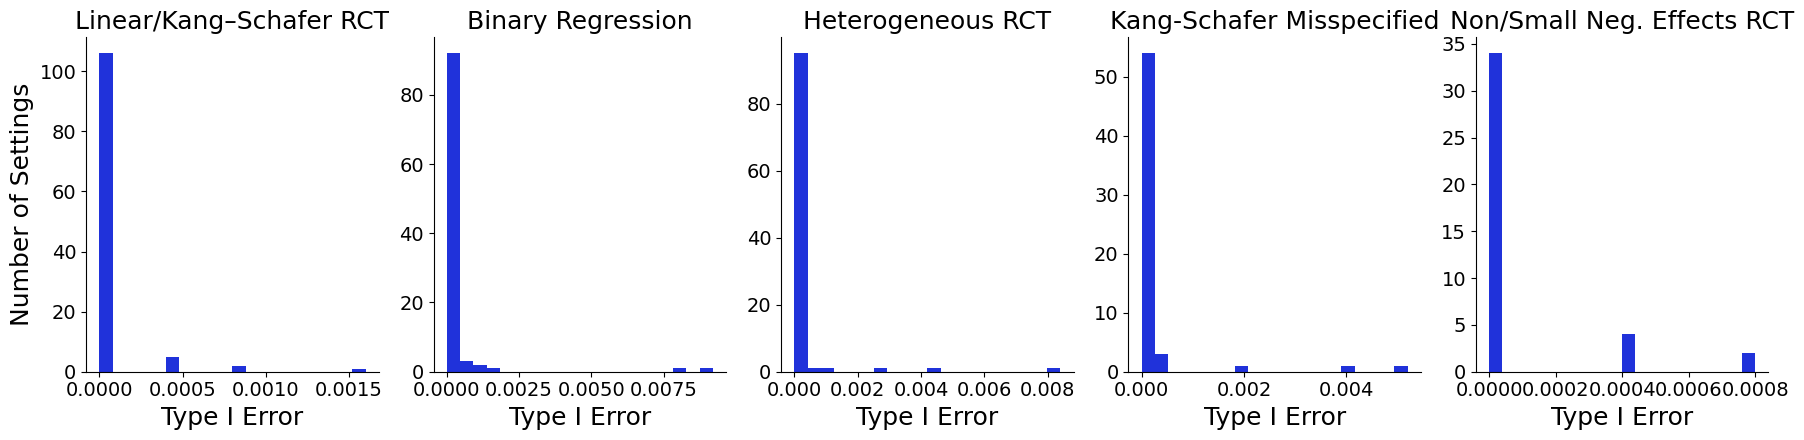

In [5]:
fig, ax = plt.subplots(1,len(SAVELABELS),figsize=(18,4.5))

PLOT_SAVELABEL = "alt_type1_errors"

for i, label in enumerate(SAVELABELS):
    ax[i].hist(error_df_dict[label].error_mean, bins=20, color=HIST_COLOR)
    # Add title
    ax[i].set_title(setting_name_mapper[label], fontsize=TITLE_FONTSIZE)
    # Set x-labels
    ax[i].set_xlabel("Type I Error", fontsize=LABEL_FONTSIZE)
    # Tick fontsize
    ax[i].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
    if HIDESPINES:
        ax[i].spines[['right', 'top']].set_visible(False)

# Set y-label
ax[0].set_ylabel("Number of Settings", fontsize=LABEL_FONTSIZE)
fig.subplots_adjust(wspace=0)
plt.tight_layout()

# Save
if SAVE:
    plt.savefig(FIGURE_SAVEPATH + "{}.pdf".format(PLOT_SAVELABEL), bbox_inches="tight", dpi=300)

plt.show()